<a href="https://colab.research.google.com/github/Manya123-max/Machine-Learning-Algorithms/blob/main/DBSCAN_CLUSTERING3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [ ]:
data= pd.read_csv('/content/MOBILE PRICE PREDICTION.csv')
print(data)

       Brand              Model Storage    RAM  Screen Size (inches)  \
0      Apple      iPhone 13 Pro   128 GB   6 GB                  6.1   
1    Samsung   Galaxy S21 Ultra   256 GB  12 GB                  6.8   
2    OnePlus              9 Pro   128 GB   8 GB                  6.7   
3     Xiaomi  Redmi Note 10 Pro   128 GB   6 GB                 6.67   
4     Google            Pixel 6   128 GB   8 GB                  6.4   
..       ...                ...      ...    ...                  ...   
402  Samsung   Galaxy Note20 5G      128      8                  6.7   
403   Xiaomi      Mi 10 Lite 5G      128      6                 6.57   
404    Apple  iPhone 12 Pro Max      128      6                  6.7   
405     Oppo              Reno3      128      8                  6.4   
406  Samsung    Galaxy S10 Lite      128      6                  6.7   

            Camera (MP)  Battery Capacity (mAh) Price ($)  
0          12 + 12 + 12                    3095       999  
1    108 + 10 +

In [ ]:
data.shape

(407, 8)

In [ ]:
data.head(10)

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799
5,Apple,iPhone 13,128 GB,4 GB,6.1,12 + 12,2815,799
6,Samsung,Galaxy Z Flip3,256 GB,8 GB,6.7,12 + 12,3300,999
7,Xiaomi,Poco X3 Pro,128 GB,6 GB,6.67,48 + 8 + 2 + 2,5160,249
8,Oppo,Reno6 Pro+ 5G,128 GB,8 GB,6.55,50 + 13 + 16 + 2,4500,699
9,Vivo,X70 Pro+,256 GB,12 GB,6.78,50 + 48 + 12 + 8,4500,1199


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Brand                   407 non-null    object
 1   Model                   407 non-null    object
 2   Storage                 407 non-null    object
 3   RAM                     407 non-null    object
 4   Screen Size (inches)    407 non-null    object
 5   Camera (MP)             407 non-null    object
 6   Battery Capacity (mAh)  407 non-null    int64 
 7   Price ($)               407 non-null    object
dtypes: int64(1), object(7)
memory usage: 25.6+ KB


In [ ]:
data.isnull().sum()

Brand                     0
Model                     0
Storage                   0
RAM                       0
Screen Size (inches)      0
Camera (MP)               0
Battery Capacity (mAh)    0
Price ($)                 0
dtype: int64

In [ ]:
data.duplicated().sum()

26

In [ ]:
data1=data.drop_duplicates()
print(data1)

       Brand              Model Storage    RAM  Screen Size (inches)  \
0      Apple      iPhone 13 Pro   128 GB   6 GB                  6.1   
1    Samsung   Galaxy S21 Ultra   256 GB  12 GB                  6.8   
2    OnePlus              9 Pro   128 GB   8 GB                  6.7   
3     Xiaomi  Redmi Note 10 Pro   128 GB   6 GB                 6.67   
4     Google            Pixel 6   128 GB   8 GB                  6.4   
..       ...                ...      ...    ...                  ...   
401   Huawei           P30 Lite      128      4                 6.15   
402  Samsung   Galaxy Note20 5G      128      8                  6.7   
403   Xiaomi      Mi 10 Lite 5G      128      6                 6.57   
404    Apple  iPhone 12 Pro Max      128      6                  6.7   
405     Oppo              Reno3      128      8                  6.4   

            Camera (MP)  Battery Capacity (mAh) Price ($)  
0          12 + 12 + 12                    3095       999  
1    108 + 10 +

In [ ]:
# Assuming df is your DataFrame
# First, identify columns with categorical data
categorical_cols = data1.select_dtypes(include=['object']).columns.tolist()

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate through each categorical column and encode the values
for col in categorical_cols:
    data1[col] = label_encoder.fit_transform(data1[col])

# Now, data contains the encoded values for categorical columns
print(data1)

     Brand  Model  Storage   RAM   Screen Size (inches)  Camera (MP)  \
0        0    232         1    15                     8           15   
1       12    100         4     1                    35            0   
2        9     19         1    18                    31           53   
3       15    178         1    15                    30          119   
4        4    162         1    18                    15           87   
..     ...    ...       ...   ...                   ...          ...   
401      5    155         0    10                     9           69   
402     12     95         0    17                    31           19   
403     15    111         0    14                    26           70   
404      0    229         0    14                    31           17   
405     10    188         0    17                    15           59   

     Battery Capacity (mAh)  Price ($)  
0                      3095         88  
1                      5000         45  
2           

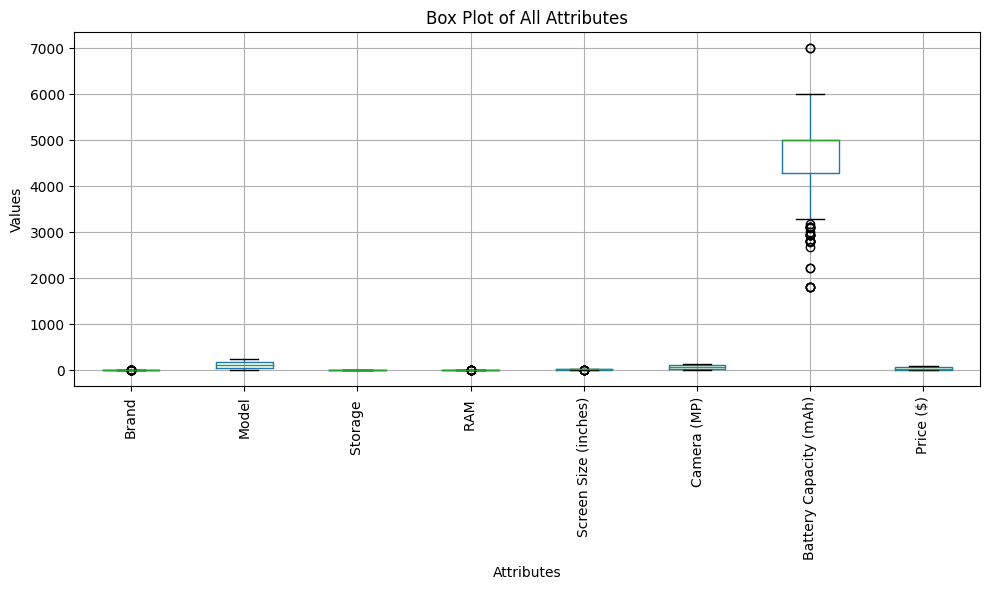

In [ ]:
# Create box plots for all attributes
plt.figure(figsize=(10, 6))  # Set the figure size
data1.boxplot()  # Create box plots for all attributes
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Box Plot of All Attributes')
plt.ylabel('Values')
plt.xlabel('Attributes')
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

In [ ]:
# Handling outliers
def handle_outliers(data1, threshold=3):
    numerical_columns = data1.select_dtypes(include=np.number).columns
    for column in numerical_columns:
        z_scores = np.abs((data1[column] - data1[column].mean()) / data1[column].std())
        data1 = data1[z_scores < threshold]
    return data1

# Call the function to handle outliers
cleaned_data = handle_outliers(data1=data1)
print(cleaned_data)

     Brand  Model  Storage   RAM   Screen Size (inches)  Camera (MP)  \
0        0    232         1    15                     8           15   
1       12    100         4     1                    35            0   
2        9     19         1    18                    31           53   
3       15    178         1    15                    30          119   
4        4    162         1    18                    15           87   
..     ...    ...       ...   ...                   ...          ...   
401      5    155         0    10                     9           69   
402     12     95         0    17                    31           19   
403     15    111         0    14                    26           70   
404      0    229         0    14                    31           17   
405     10    188         0    17                    15           59   

     Battery Capacity (mAh)  Price ($)  
0                      3095         88  
1                      5000         45  
2           

In [ ]:
X=cleaned_data.copy()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
X_scaled = scaler.fit_transform(X)

# Create a DataFrame from the scaled data
scaled_data = pd.DataFrame(X_scaled, columns=X.columns)

# Now you have the scaled data in the scaled_data variable
print(scaled_data)


        Brand     Model  Storage       RAM   Screen Size (inches)  \
0    0.000000  0.974790  0.083333  0.789474                 0.200   
1    0.800000  0.420168  0.333333  0.052632                 0.875   
2    0.600000  0.079832  0.083333  0.947368                 0.775   
3    1.000000  0.747899  0.083333  0.789474                 0.750   
4    0.266667  0.680672  0.083333  0.947368                 0.375   
..        ...       ...       ...       ...                   ...   
370  0.333333  0.651261  0.000000  0.526316                 0.225   
371  0.800000  0.399160  0.000000  0.894737                 0.775   
372  1.000000  0.466387  0.000000  0.736842                 0.650   
373  0.000000  0.962185  0.000000  0.736842                 0.775   
374  0.666667  0.789916  0.000000  0.894737                 0.375   

     Camera (MP)  Battery Capacity (mAh)  Price ($)  
0       0.105634                0.093757   1.000000  
1       0.000000                0.535855   0.511364  
2       0

In [ ]:
from sklearn.metrics import silhouette_score

# Initialize DBSCAN
db = DBSCAN(eps=0.3, min_samples=10)

# Fit DBSCAN to the scaled data
db.fit(X_scaled)

# Extract the cluster labels
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters:", n_clusters_)
print("Estimated number of noise points:", n_noise_)
print(f"Silhouette Score: {silhouette_score(X_scaled, labels):.3f}")


Estimated number of clusters: 6
Estimated number of noise points: 290
Silhouette Score: -0.152


In [ ]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the data
X_normalized = scaler.fit_transform(X)

# Create a DataFrame from the normalized data
normalized_data = pd.DataFrame(X_normalized, columns=X.columns)

# Now you have the normalized data in the normalized_data variable
print(normalized_data)


        Brand     Model  Storage       RAM   Screen Size (inches)  \
0   -2.580906  1.667755 -0.729418  0.440610             -1.855439   
1    0.422476 -0.231869 -0.012741 -2.509902              1.770564   
2   -0.328370 -1.397548 -0.729418  1.072862              1.233378   
3    1.173321  0.890636 -0.729418  0.440610              1.099082   
4   -1.579779  0.660379 -0.729418  1.072862             -0.915364   
..        ...       ...       ...       ...                   ...   
370 -1.329497  0.559641 -0.968310 -0.613145             -1.721142   
371  0.422476 -0.303825 -0.968310  0.862112              1.233378   
372  1.173321 -0.073567 -0.968310  0.229859              0.561896   
373 -2.580906  1.624582 -0.968310  0.229859              1.233378   
374 -0.078088  1.034547 -0.968310  0.862112             -0.915364   

     Camera (MP)  Battery Capacity (mAh)  Price ($)  
0      -1.398944               -2.273675   1.792778  
1      -1.760789                0.379364   0.170161  
2      -0

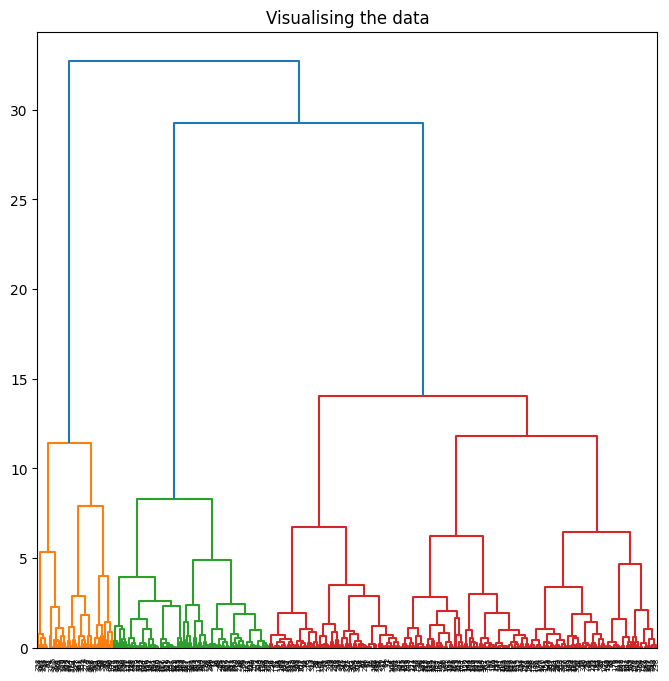

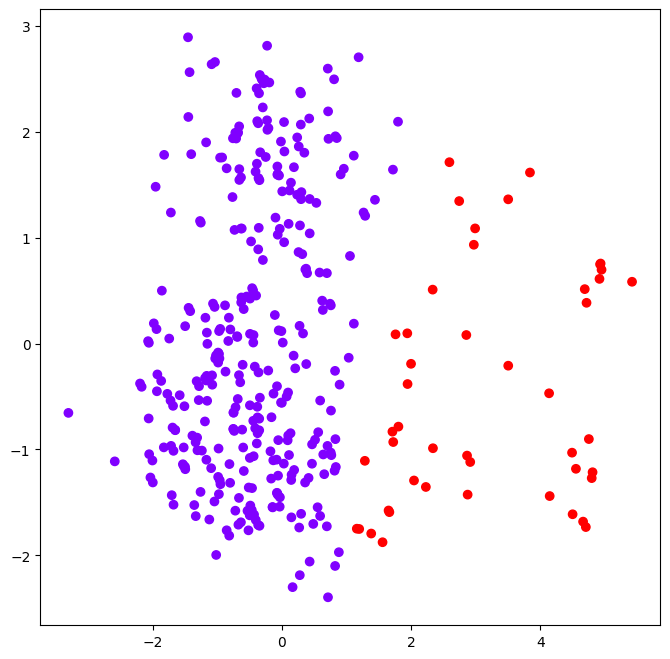

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
# PCA – Preprocesing
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(normalized_data)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']
# Modeling and display
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')))
# Finding best “K” using Scatter plot with various clusters head
ac2 = AgglomerativeClustering(n_clusters = 2)
# Visualizing the clustering
plt.figure(figsize =(8, 8))
plt.scatter(X_principal['P1'], X_principal['P2'], c = ac2.fit_predict(X_principal), cmap ='rainbow')
plt.show()

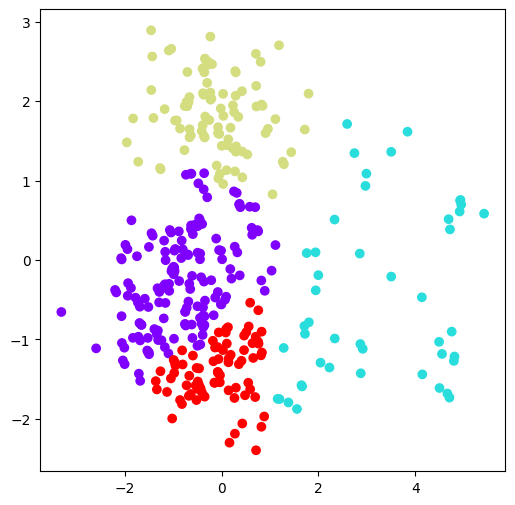

In [ ]:
ac4 = AgglomerativeClustering(n_clusters = 4)
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'], c = ac4.fit_predict(X_principal), cmap ='rainbow')
plt.show()

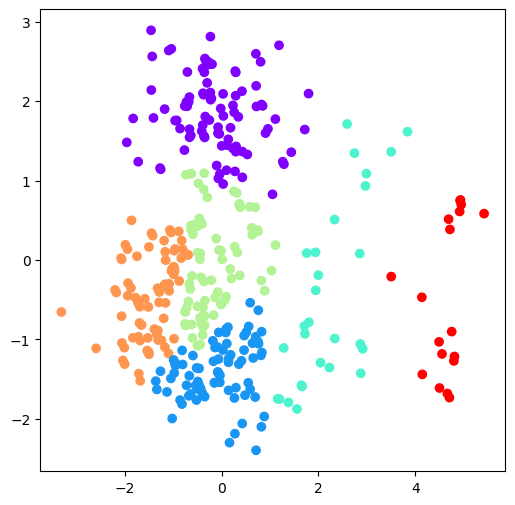

In [ ]:
ac6 = AgglomerativeClustering(n_clusters = 6)
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'], c = ac6.fit_predict(X_principal), cmap ='rainbow')
plt.show()

In [ ]:
# Appending the silhouette scores of the different models to the list
k = [2, 4, 6]
silhouette_scores = []
silhouette_scores.append( silhouette_score(X_principal, ac2.fit_predict(X_principal)))
silhouette_scores.append( silhouette_score(X_principal, ac4.fit_predict(X_principal)))
silhouette_scores.append( silhouette_score(X_principal, ac6.fit_predict(X_principal)))

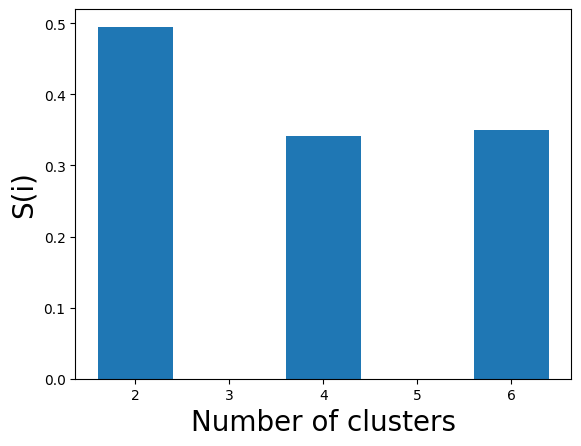

In [ ]:
# Plotting a bar graph to compare the results
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()